This notebook contains the work-in-progress (WIP) scrap for the `imbed` project.

It is not meant to be run by all.


In [1]:
# import imbed_data_prep.hcp
from imbed_data_prep import hcp
from imbed_data_prep.hcp import Hcp3Dacc

Hcp3Dacc

imbed_data_prep.hcp.Hcp3Dacc

# Interface

## index and search docs

In [ ]:

docs = {
    "doc_1": "Socrates is a man",
    "doc_2": "All men are mortal",
    "doc_3": "Simone de Beauvoir"
}

# Make a class VectorDB the wraps a vector database (e.g. chromadb).
# It should take as parameters what ever you want (immbeder, text splitter, etc.)
# and that has the following methods:
vectordb = VectorDB(...)

vectordb.add(docs)
# should add the docs.values() content, using the docs.keys() as ids
# Ids should be maintained to be unique.
# If the ids already exist, there should be options on how to handle it:
#   - error
#   - overwrite
#   - skip (i.e. only add the ids that don't already exist)

ids: Iterable = vectordb.search(query: str)
# if possible, should yield ids instead of returning a list of them
# That is, search should return an iterable or iterator.
# But do this only if the underlying vectordb search supports it (generators etc.)
ids = vectordb.search(query, k=2)  # optionally yeilds the top k results


metadata = {
    "doc_1": {"author": "Plato", "year": 400},
    "doc_2": {"author": "Plato", "year": 400},
    "doc_3": {"author": "Sartre", "year": 1949}
}
vectordb.add_metadata(metadata)



In [21]:
from typing import Iterable, Mapping, Protocol, Any, Literal

# Literal is a "typing" way of doing Enum
WhenIdExists = Literal["error", "overwrite", "skip"]

DocKey = str
DocContent = str

class VectorDB(Protocol):

    def add(self, docs: Mapping[DocKey, DocContent], when_id_exists: WhenIdExists = "error"):
        pass

    def search(self, query: str, k: int = 10) -> Iterable[DocKey]:
        pass

    def get_doc_content(self, key: DocKey) -> DocContent:
        pass

    def add_metadata(self, metadata: Mapping[DocKey, dict]):
        pass
    
docs = {
    "doc_1": "Socrates is a man",
    "doc_2": "All men are mortal",
    "doc_3": "Simone de Beauvoir"
}

def test_mapping_indexing(vectordb: VectorDB):
    vectordb.add(docs)
    ids = vectordb.search("Socrates")
    ids = set(ids)
    assert "doc_1" in ids

    first_id = next(iter(vectordb.search("Socrates")))
    assert first_id == 'doc_1'

    # test idempotency (look up idempotent)
    # i.e. when_id_exists
    docs_2 = {
        'doc_3': 'de Beauvoir',
        'doc_4': 'the second sex'
    }
    vectordb.add(docs_2, when_id_exists='overwrite')
    # test that doc_3 was overwritten and doc_4 was added


LangChainVectorDB: VectorDB  # Note I mean LangChainVectorDB has interface of VectorDB
ChromaDBVectorDB: VectorDB  # Note I mean LangChainVectorDB has interface of VectorDB





In [44]:
from typing import Tuple, List

SegmentKey = Tuple[DocKey, int, int]

class SegmentMapping:
    def __init__(self, docs: Mapping, segment_keys: List[SegmentKey]):
        self.docs = docs
        self.segment_keys = segment_keys

    def __iter__(self):
        yield from self.segment_keys

    def __getitem__(self, key: SegmentKey):
        # if you want to validate
        # if key not in self.segment_keys:
        #     raise KeyError(key)
        doc_key, start_idx, end_idx = key
        return self.docs[doc_key][start_idx:end_idx]
    
    def __len__(self):
        return len(self.segment_keys) + 1
    
    def __contains__(self, key: SegmentKey):
        # Optional, but faster this way
        return key in self.segment_keys
    

def test_segment_mapping(segment_mapping_cls=SegmentMapping):
    docs = {
        "doc_1": "Socrates is a man",
        "doc_2": "All men are mortal",
        "doc_3": "Simone de Beauvoir"
    }
    segment_keys = [('doc_1', 0, 8), ('doc_1', 9, 11)]
    a = SegmentMapping(docs, segment_keys)
    assert list(a) == [('doc_1', 0, 8), ('doc_1', 9, 11)]
    assert len(a) == 2
    assert a['doc_1', 0, 8] == 'Socrates'



AssertionError: 

In [41]:
assert list(a) == [('doc_1', 0, 8), ('doc_1', 9, 11)]
assert a['doc_1', 0, 8] == 'Socrates'


In [ ]:
def test_segment_mapping(segment_mapping_cls=SegmentMapping):
    docs = {
        "doc_1": "Socrates is a man",
        "doc_2": "All men are mortal",
        "doc_3": "Simone de Beauvoir"
    }
    segment_keys = [('doc_1', 0, 8), ('doc_1', 9, 11)]
    a = SegmentMapping(docs, segment_keys)
    assert list(a) == [('doc_1', 0, 8), ('doc_1', 9, 11)]
    assert a['doc_1', 0, 8] == 'Socrates'

In [28]:
t = {
    ("doc_1", 0, 8): "Socrates",
    ("doc_1", 10, 12): "is",
}

t["doc_1", 0, 8]

'Socrates'

In [29]:
list(t)

[('doc_1', 0, 8), ('doc_1', 10, 12)]

In [9]:
from typing import Any


class Startswith:
    def __init__(self, char: str) -> None:
        self.char = char
    def __contains__(self, key):
        return key.startswith(self.char)

    
s = Startswith('b')

'bsdf' in s

True

In [10]:
for i in s:
    print(i)

TypeError: 'Startswith' object is not iterable

'/Users/thorwhalen/Dropbox/py/proj/t/imbed/misc'

In [5]:
from dol import TextFiles, filt_iter

s = TextFiles('/Users/thorwhalen/Dropbox/py/proj/a')
s = filt_iter(s, filt=lambda x: x.endswith('.py'))

all_py_addaix_files = list(s)
print(f"{len(all_py_addaix_files)}")
list(all_py_addaix_files)



24


['srag/srag/mz/mz_mockups.py',
 'srag/srag/ad/ad_mockups.py',
 'srag/srag/__init__.py',
 'srag/srag/tw/__init__.py',
 'srag/srag/tw/mockups.py',
 'srag/srag/tw/ragdag1.py',
 'srag/srag/tw/raglab2.py',
 'srag/srag/tw/tw_util.py',
 'srag/setup.py',
 'raglab/docsrc/conf.py',
 'raglab/raglab/util.py',
 'raglab/raglab/tests/test_stores_util.py',
 'raglab/raglab/__init__.py',
 'raglab/raglab/stores/__init__.py',
 'raglab/raglab/stores/stores_util.py',
 'raglab/raglab/stores/simple_stores.py',
 'raglab/raglab/raglab2.py',
 'raglab/raglab/retrieval/chroma_client.py',
 'raglab/raglab/app.py',
 'raglab/raglab/web_services/prompt_templates_dde.py',
 'raglab/raglab/web_services/__init__.py',
 'raglab/raglab/web_services/mockups.py',
 'raglab/raglab/web_services/store_access.py',
 'raglab/setup.py']

In [7]:
print(s['srag/srag/ad/ad_mockups.py'])

import re
from typing import Mapping

import sys

# from srag.tw.tw_util import _module_callables, _skip_this


# @_skip_this
# def igore_this(x):
#     return x + 1


def user_function(obj):
    obj._user_function__ = True
    return obj


def is_user_function(obj):
    return hasattr(obj, "_user_function__")


def get_user_functions(module):
    return [v for k, v in vars(module).items() if is_user_function(v)]


datasets = {
    'philosophy': {
        "statement_1": "Bob is a man",
        "statement_2": "Bob is a name",
        "statement_3": "Men are mortal",
        "statement_4": "1 + 1 = 2",
    },
    'fruit': {
        "apples": "Apples are red",
        "more_apples": "Apples are fruit",
        "good": "Fruit are good",
        "outlier": "Cars drive on the road",
    },
}


@user_function
def dataset_list():
    return list(datasets.keys())


stopwords = {
    'is',
    'are',
    'a',
    'an',
    'the',
    'on',
    'in',
    'at',
    'for',
    'to',
    'of',
    '

Note `grub`'s interface, which could be used, with some modifications.

In [7]:
import grub
from i2 import Sig

def print_obj_info(obj, max_n_doc_lines=3, *, suffix='\n'):
    sig = Sig(obj)
    print(f"{obj.__name__}({sig})\n")
    lines = obj.__doc__.splitlines()[:max_n_doc_lines]
    docstr = "\n".join(lines)
    print(f"{docstr}")
    print(suffix)

print_obj_info(grub.SearchStore)
print_obj_info(grub.TfidfKnnSearcher)

SearchStore((store, n_neighbors: int = 10, tokenizer=<function camelcase_and_underscore_tokenizer at 0x137beecb0>))

Build a search index for anything (that is given a mapping interface with string values).

    A store is anything with a ``collections.Mapping`` interface.


TfidfKnnSearcher((search_store: Mapping = <grub.base.DfltSearchStore object at 0x134aaac50>, tfidf: sklearn.feature_extraction.text.TfidfVectorizer = TfidfVectorizer(), knn: sklearn.neighbors._unsupervised.NearestNeighbors = NearestNeighbors(metric='cosine', n_neighbors=10)) -> None)

TfidfKnnSearcher(search_store: Mapping = <grub.base.DfltSearchStore object at 0x134aaac50>, tfidf: sklearn.feature_extraction.text.TfidfVectorizer = TfidfVectorizer(), knn: sklearn.neighbors._unsupervised.NearestNeighbors = NearestNeighbors(metric='cosine', n_neighbors=10))




In [ ]:
import langchain

In [ ]:
from functools import partial, cached_property
from dataclasses import dataclass
from typing import Mapping, Callable, MutableMapping

class Imbed:
    docs: Mapping = None
    segments: MutableMapping = None
    embedder: Callable = None

raw_docs = mk_text_store(doc_src_uri)  # the store used will depend on the source and format of where the docs are stored
segments = mk_segments_store(raw_docs, ...)  # will not copy any data over, but will give a key-value view of chunked (split) docs
search_ctrl = mk_search_controller(vectorDB, embedder, ...)
search_ctrl.fit(segments, doc_src_uri, ...)
search_ctrl.save(...)

# Typical pipelines

## Articles

In [1]:
from pdfdol import PdfFilesReader 
from dol import TextFiles, filt_iter, wrap_kvs, Pipe, add_ipython_key_completions



In [7]:
rootdir = '/Users/thorwhalen/Dropbox/_goodreader/_ai/LLM'


In [3]:
src_store = PdfFilesReader(rootdir)
src_store

Files(rootdir='/Users/thorwhalen/Dropbox/_goodreader/_ai/LLM', subpath='', pattern_for_field=None, max_levels=None, include_hidden=False, assert_rootdir_existence=False)

In [ ]:
from imbed.segmentation import SegmentMapping

In [5]:
def _mk_page_segment_keys(src_store):
    segment_keys = []
    for doc_key in src_store:
        for i, page in enumerate(src_store[doc_key]):
            segment_keys.append((doc_key, i, i+1))
    return segment_keys

segment_keys = _mk_page_segment_keys(src_store)
print(f"{len(segment_keys)=}")
segment_keys[:5]

len(segment_keys)=317


[('A Survey on Hardware Accelerators for Large Language Models', 0, 1),
 ('A Survey on Hardware Accelerators for Large Language Models', 1, 2),
 ('A Survey on Hardware Accelerators for Large Language Models', 2, 3),
 ('A Survey on Hardware Accelerators for Large Language Models', 3, 4),
 ('A Survey on Hardware Accelerators for Large Language Models', 4, 5)]

In [15]:
from dol import wrap_kvs
segments = wrap_kvs(SegmentMapping(src_store, segment_keys), obj_of_data=lambda x: x[0])
print(f"{len(segments)=}")
list(segments)[:3]

len(segments)=317


[('A Survey on Hardware Accelerators for Large Language Models', 0, 1),
 ('A Survey on Hardware Accelerators for Large Language Models', 1, 2),
 ('A Survey on Hardware Accelerators for Large Language Models', 2, 3)]

In [17]:
key = next(iter(segments))
print(f"{key=}")
print(segments[key][:200])

key=('A Survey on Hardware Accelerators for Large Language Models', 0, 1)
A Survey on Hardware Accelerators for Large Language Models
CHRISTOFOROS KACHRIS, University of West Attica, Greece
Large Language Models (LLMs) have emerged as powerful tools for natural language pro


In [18]:
import oa

segment_embeddings = dict(zip(segments, oa.embeddings(list(segments.values()))))

In [23]:
from imbed.util import cosine_similarity

def search(query, embeddings_store, *, n=5, embedder=oa.embeddings, metric=cosine_similarity):
    # But obviously we'll use an indexer
    query_embedding = embedder(query)
    _sorted = sorted(
        embeddings_store, 
        key=lambda k: metric(embeddings_store[k], query_embedding), reverse=True)
    return _sorted[:n]
    

## Code

In [9]:
from dol import TextFiles, filt_iter, wrap_kvs, Pipe
import dol

wrapper = Pipe(
    filt_iter(filt=lambda x: x.endswith('.py') and not str(x).startswith('test')),
)

PyFiles = wrapper(TextFiles)

rootdir = dol.__path__[0]
print(f"{rootdir=}")

py_files = PyFiles(rootdir)
list(py_files)

def objects_of_module(code_str):
    """Yields objects of a module defined in a code string, along with the object's 
    code start and finish character index"""
    import ast
    tree = ast.parse(code_str)
    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            yield node.name, node.lineno, node.end_lineno
        elif isinstance(node, ast.ClassDef):
            yield node.name, node.lineno, node.end_lineno

it = objects_of_module(py_files['filesys.py'])
next(it)

rootdir='/Users/thorwhalen/Dropbox/py/proj/i/dol/dol'


('ensure_slash_suffix', 17, 22)

In [10]:
string = py_files['filesys.py']
string[17:22]

'cess"'

In [19]:
from guide import Attrs
import dol
t = dir(dol.filesys)
dol.filesys.DirCollection.__module__

'dol.filesys'

In [21]:
import ast

def objects_of_module(code_str):
    """
    Yields objects of a module defined in a code string, along with the object's 
    code start and finish character index.
    """
    class ObjectVisitor(ast.NodeVisitor):
        def __init__(self, source_lines):
            self.source_lines = source_lines

        def visit_FunctionDef(self, node):
            self.generic_visit(node)  # Visit all nodes to ensure we don't miss nested objects
            start_line, start_col = node.lineno, node.col_offset
            end_line = node.body[-1].end_lineno if hasattr(node.body[-1], 'end_lineno') else node.lineno
            end_col = node.body[-1].end_col_offset if hasattr(node.body[-1], 'end_col_offset') else len(self.source_lines[end_line - 1])
            start_index = sum(len(self.source_lines[i]) + 1 for i in range(start_line - 1)) + start_col
            end_index = sum(len(self.source_lines[i]) + 1 for i in range(end_line - 1)) + end_col
            yield (node.name, start_index, end_index)

        def visit_ClassDef(self, node):
            self.generic_visit(node)  # Visit all nodes to ensure we don't miss nested objects
            start_line, start_col = node.lineno, node.col_offset
            end_line = node.body[-1].end_lineno if hasattr(node.body[-1], 'end_lineno') else node.lineno
            end_col = node.body[-1].end_col_offset if hasattr(node.body[-1], 'end_col_offset') else len(self.source_lines[end_line - 1])
            start_index = sum(len(self.source_lines[i]) + 1 for i in range(start_line - 1)) + start_col
            end_index = sum(len(self.source_lines[i]) + 1 for i in range(end_line - 1)) + end_col
            yield (node.name, start_index, end_index)
    
    # Parse the code into an AST
    tree = ast.parse(code_str)
    # Split the code string into lines for index calculation
    source_lines = code_str.splitlines(True)  # Keep line endings
    # Create an instance of our custom visitor
    visitor = ObjectVisitor(source_lines)
    # Traverse the AST to find and yield objects
    for obj in ast.walk(tree):
        if isinstance(obj, (ast.FunctionDef, ast.ClassDef)):
            yield from visitor.visit(obj)

# This call is commented out to avoid execution in the PCI.
# To use this function, uncomment the following line and provide a valid Python code string.
# list(objects_of_module("your_code_string_here"))
            

it = objects_of_module(py_files['filesys.py'])


In [22]:
def objects_of_module(code_str):
    """Yields all callable objects of a module defined in a code string"""
    

('ensure_slash_suffix', 429, 656)

In [24]:
print(py_files['filesys.py'][429:656])

_suffix(path: str):
    r"""Add a file separation (/ or \) at the end of path str, if not already present."""
    if not path.endswith(file_sep):
        return path + file_sep
    else:
        return path


def paths_in_dir(r


# Generating test data for segmentation for extraction

Here we write a few functions that can help to generate test data for segmentation for extraction
--That is, segmentation that has the underlying goal of being used by an information-extraction
system. 

Given this extraction goal, we want to generate text where we inject the information that 
needs to be extracted. Simplest (and most builtin) way to do this is to use string templates.

In [ ]:
from typing import Dict, Callable

Template = str
Text = str
Information = dict
Extractor = Callable[[Text], Information]
EvaluationScore = float
Comparator = Callable[[Information, Information], EvaluationScore]


def generate_text(text_template: Template, information: Information) -> Text:
    """
    Generate text by injecting information into a template.

    :param text_template: A string with placeholders.
    :param information: A dictionary with keys matching the placeholders in the template.
    :return: A string with the information injected into the placeholders.
    """
    return text_template.format(**information)


# Function to evaluate an information extractor
def information_extractor_evaluator(
    text: Text,
    extractor: Extractor,
    expected_information: Information,
    comparator: Comparator,
) -> EvaluationScore:
    """
    Evaluate an information extractor.

    :param text: The input text.
    :param extractor: A function that takes a text and outputs a dict of extracted information.
    :param comparator: A function that takes two dicts and returns a score from 0 to 1 based on how they compare.
    :return: The score comparing the extracted information to the expected information.
    """
    extracted_information = extractor(text)
    score = comparator(expected_information, extracted_information)
    return score


# Examples of text templates and corresponding information
examples = [
    {
        "text_template": "The quick {color} fox jumps over the lazy {animal}.",
        "information": [
            {"color": "brown", "animal": "dog"},
            {"color": "red", "animal": "cat"},
        ],
    },
    {
        "text_template": "In {year}, a {profession} named {name} discovered a new species of {species}.",
        "information": [
            {
                "year": "2021",
                "profession": "biologist",
                "name": "Dr. Smith",
                "species": "frog",
            },
            {
                "year": "2022",
                "profession": "zoologist",
                "name": "Dr. Jones",
                "species": "lizard",
            },
        ],
    },
    {
        "text_template": "The {company} CEO, {name}, announced a new {product} that will be released in {month}.",
        "information": [
            {
                "company": "TechCorp",
                "name": "Jane Doe",
                "product": "smartphone",
                "month": "June",
            },
            {
                "company": "InnovateInc",
                "name": "John Doe",
                "product": "laptop",
                "month": "July",
            },
        ],
    },
]


# Example extractor function
def example_extractor(text: Text):
    """
    An example extractor that returns a dictionary of extracted information.

    :param text: The input text.
    :return: A dictionary of extracted information.
    """
    # This is a dummy extractor for demonstration purposes
    if "fox" in text:
        return {"color": "brown", "animal": "dog"}
    elif "discovered" in text:
        return {
            "year": "2021",
            "profession": "biologist",
            "name": "Dr. Smith",
            "species": "frog",
        }
    elif "CEO" in text:
        return {
            "company": "TechCorp",
            "name": "Jane Doe",
            "product": "smartphone",
            "month": "June",
        }
    return {}


# Example comparator function
def example_comparator(dict1: Information, dict2: Information) -> EvaluationScore:
    """
    An example comparator that returns a score based on the similarity of two dictionaries.

    :param dict1: The first dictionary.
    :param dict2: The second dictionary.
    :return: A score from 0 to 1 based on how the dictionaries compare.
    """
    if dict1 == dict2:
        return 1.0
    return 0.0


# Generating and printing texts based on the examples
def run_test(examples, example_extractor, example_comparator, *, verbose=0):
    for example in examples:
        text_template = example["text_template"]
        for info in example["information"]:
            text = generate_text(text_template, info)
            if verbose:
                print("Generated Text:", text)
            # Testing the information extractor evaluator
            yield information_extractor_evaluator(
                text, example_extractor, info, example_comparator
            )


scores = list(run_test(examples, example_extractor, example_comparator, verbose=1))
assert scores == [1.0, 0.0, 1.0, 0.0, 1.0, 0.0]


import operator
import numpy as np
from typing import Callable, Dict

Key = str
from lkj import compare_field_values

compare_dicts = partial(
    compare_field_values, 
    field_comparators = {},
    default_comparator = operator.eq,
    aggregator = lambda d: np.mean(list(d.values()))
)


Generated Text: The quick brown fox jumps over the lazy dog.
Generated Text: The quick red fox jumps over the lazy cat.
Generated Text: In 2021, a biologist named Dr. Smith discovered a new species of frog.
Generated Text: In 2022, a zoologist named Dr. Jones discovered a new species of lizard.
Generated Text: The TechCorp CEO, Jane Doe, announced a new smartphone that will be released in June.
Generated Text: The InnovateInc CEO, John Doe, announced a new laptop that will be released in July.


# Simple Embed-Planarize-Cluster Pipeline

In [ ]:
from i2 import FuncFactory
from sklearn.cluster import KMeans



# jokes

In [2]:
import ha

list(ha.joke_datasets)

Thor was featured on wheel of fortune all people did for the past 30 minutes was stare at a wheel not stopping


['reddit_jokes', 'stupidstuff', 'wocka']

In [3]:
jokes = ha.joke_datasets['reddit_jokes']
len(jokes)

194553

In [46]:
joke = jokes[14]
joke

{'body': 'cuz all they do is Tweet',
 'id': '5tyyo2',
 'score': 1,
 'title': "If I get a bird I'm naming it Trump"}

In [59]:
from typing import Iterable


def reddit_joke_metadata_to_key_and_text(metdata: dict, *, sep='\n'):
    return f"{metdata['title']}{sep}({metdata['body']})"


def partition(a: Iterable, chk_size: int):
    return zip(*([iter(a)] * chk_size))


segment = next(partition(jokes, 20))
len(segment)

20

In [66]:
import oa

# len(oa.embeddings('alexis et sana'))

1536

In [70]:
cumul = []
for joke in segment:
    text = reddit_joke_metadata_to_key_and_text(joke)
    vector = oa.embeddings(text)
    cumul.append(vector)
    

In [71]:
len(cumul), len(cumul[0])

(20, 1536)

In [72]:
texts = list(map(reddit_joke_metadata_to_key_and_text, segment))
cumul2 = oa.embeddings(texts)

In [73]:
len(cumul2), len(cumul2[0])

(20, 1536)

In [77]:
t = [x == y for x, y in zip(cumul, cumul2)]

In [87]:
import numpy as np

a = np.array(cumul)
aa = np.array(cumul2)

np.allclose(a, aa, rtol=1e-4, atol=1e-3)

False

In [4]:
jokes[500]

{'body': 'Someone who lays awake at night wondering if there really is a dog. ',
 'id': '5tqvz0',
 'score': 93,
 'title': 'What do you get when you cross an insomniac, an agnostic and a dyslexic?'}

In [13]:
from typing import Iterable, Iterator
isinstance(g, Iterable)


True

# Embed HCP2 publications

**NOTE: All of the following should be refactored to a controller and put in a separate notebook**.

THe notebook is called `hcp_analysis.ipynb` and the controller looks like the follwing:

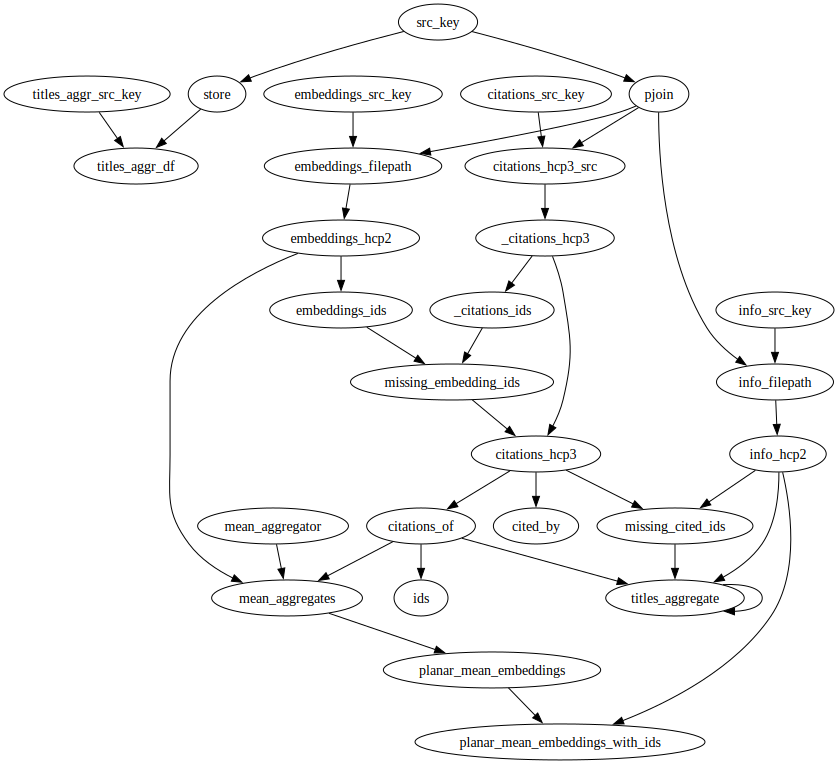

In [1]:
from i2.footprints import attribute_dependencies, init_argument_names
from imbed_data_prep.hcp import Hcp3Dacc
from meshed.itools import graphviz_digraph

deps = dict(attribute_dependencies(Hcp3Dacc))

graphviz_digraph(deps)

And now on with the old stuff...

In [2]:
from dol import FilesOfZip


zipfile = '/Users/thorwhalen/Dropbox/_odata/figiri/hcp/publications-hcp2.tsv.zip'
s = FilesOfZip(zipfile)
list(s)

['publications-hcp2.tsv']

In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(s['publications-hcp2.tsv']), sep='\t', encoding='latin-1' ) 
print(f"{df.shape}")
df.head(10)

(354165, 7)


,id,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,Pathophysiology of obsessiveâcompulsive diso...,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences
5,898828,The Unknown Mechanism of the Overtraining Synd...,Sports Medicine,2002-01-01,300,157,Biomedical and health sciences
6,905619,Revisiting Frank-Wolfe: Projection-Free Sparse...,NaN,2013-06-16,552,1612,Mathematics and computer science
7,947309,GFP and Ã-Galactosidase Transformation Vector...,BioTechniques,2000-10-01,311,268,Biomedical and health sciences
8,1212948,NaN,Journal of Polymers and the Environment,2002-01-01,306,389,Physical sciences and engineering
9,1252687,Meigsâ syndrome:,European Journal of Obstetrics & Gynecology an...,2000-10-01,421,550,Biomedical and health sciences


In [7]:
print(f"{df.title.dropna().apply(len).mean()=}")
print(f"{df.n_cits.dropna().mean()=}")

df.title.dropna().apply(len).mean()=83.58047193255189
df.n_cits.dropna().mean()=644.4399813646182


In [7]:
title_store = dict(zip(df['id'], df['title']))

In [ ]:
from dol import JsonFiles
target = JsonFiles('/Users/thorwhalen/tmp/pubs_hcp2')

In [22]:
df.head(11)

,id,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,Pathophysiology of obsessive�compulsive disorder,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences
5,898828,The Unknown Mechanism of the Overtraining Synd...,Sports Medicine,2002-01-01,300,157,Biomedical and health sciences
6,905619,Revisiting Frank-Wolfe: Projection-Free Sparse...,NaN,2013-06-16,552,1612,Mathematics and computer science
7,947309,GFP and �-Galactosidase Transformation Vectors...,BioTechniques,2000-10-01,311,268,Biomedical and health sciences
8,1212948,NaN,Journal of Polymers and the Environment,2002-01-01,306,389,Physical sciences and engineering
9,1252687,Meigs� syndrome:,European Journal of Obstetrics & Gynecology an...,2000-10-01,421,550,Biomedical and health sciences


In [4]:
# from slang import fixed_step_chunker
# from dol import JsonFiles
# import oa

# target = JsonFiles('/Users/thorwhalen/tmp/pubs_hcp2')

# for i, chunk in enumerate(fixed_step_chunker(title_store.items(), 10)):
#     ids, titles = zip(*chunk)
#     embeddings = oa.embeddings(list(titles))
#     target[f"{i:03.0f}"].update(dict(zip(ids, embeddings)))
#     break

# BadRequestError: Error code: 400 - {'error': {'message': "We could not parse the JSON 
# body of your request. (HINT: This likely means you aren't using your HTTP library correctly. 
# The OpenAI API expects a JSON payload, but what was sent was not valid JSON. 
# If you have trouble figuring out how to fix this, please contact us through our 
# help center at help.openai.com.)", 'type': 'invalid_request_error', 'param': None, 'code': None}}


In [3]:
# oa.embeddings(titles[:-2])

## Stored HCP2 embeddings

In [8]:
import os

src_folder = '/Users/thorwhalen/Dropbox/_odata/figiri/hcp'
pjoin = lambda *args: os.path.join(src_folder, *args)

embeddings_filepath = pjoin('publications-hcp2-embeddings.parquet')
info_filepath = pjoin('publications-hcp2.tsv.zip')

In [9]:
import pandas as pd

embeddings_hcp2 = pd.read_parquet(embeddings_filepath)
print(f"{embeddings_hcp2.shape=}")

info_hcp2 = pd.read_csv(info_filepath, sep='\t', encoding='latin-1')
print(f"{info_hcp2.shape=}")

embeddings_hcp2.shape=(352508, 2)
info_hcp2.shape=(354165, 7)


In [8]:
embeddings_hcp2.head()

,id,embedding
0,245658,"[0.013564770109951496, 0.010467253625392914, -..."
1,332595,"[0.02909824252128601, 0.03423166275024414, -0...."
2,718838,"[0.008440978825092316, 0.0035484367981553078, ..."
3,804345,"[0.01794605143368244, 0.04320104047656059, -0...."
4,831416,"[-0.006916569545865059, -0.017052026465535164,..."


In [13]:
info_hcp2.head()

,id,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,Pathophysiology of obsessiveâcompulsive diso...,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences


# HCP2 publications -- title citations

In [10]:
import os

src_folder = '/Users/thorwhalen/Dropbox/_odata/figiri/hcp'
pjoin = lambda *args: os.path.join(src_folder, *args)

In [11]:
embeddings_filepath = pjoin('publications-hcp2-embeddings.parquet')
citations_hcp3_src = pjoin('citation-links-hcp3.tsv.zip')
info_filepath = pjoin('publications-hcp2.tsv.zip')

In [12]:
import pandas as pd

embeddings_hcp2 = pd.read_parquet(embeddings_filepath)
print(f"{embeddings_hcp2.shape=}")

citations_hcp3 = pd.read_csv(citations_hcp3_src, sep='\t')
print(f"{citations_hcp3.shape=}")

info_hcp2 = pd.read_csv(info_filepath, sep='\t', encoding='latin-1')
print(f"{info_hcp2.shape=}")

embeddings_hcp2.shape=(352508, 2)
citations_hcp3.shape=(4891305, 3)
info_hcp2.shape=(354165, 7)


In [50]:
embeddings_hcp2.head()
embeddings_hcp2 = embeddings_hcp2.set_index('id')['embedding']
embeddings_hcp2.head()

id
245658    [0.013564770109951496, 0.010467253625392914, -...
332595    [0.02909824252128601, 0.03423166275024414, -0....
718838    [0.008440978825092316, 0.0035484367981553078, ...
804345    [0.01794605143368244, 0.04320104047656059, -0....
831416    [-0.006916569545865059, -0.017052026465535164,...
Name: embedding, dtype: object

In [13]:
citations_hcp3.head()

,citing_pub_id,cited_pub_id,date
0,245658,2013150886,2002-01-01
1,245658,2138790588,2002-01-01
2,245658,2334566563,2002-01-01
3,718838,1604916109,2004-02-01
4,718838,1965439999,2004-02-01


In [52]:
citations_ids = set(citations_hcp3['citing_pub_id']) | set(citations_hcp3['cited_pub_id'])
embeddings_ids = set(embeddings_hcp2.index)
print(f"{len(citations_ids)=}")
print(f"{len(embeddings_ids)=}")

# check if all citation ids are in the embeddings (and collect those that are not if any)
missing_ids = citations_ids - embeddings_ids
print(f"{len(missing_ids)=}")

len(citations_ids)=350777
len(embeddings_ids)=352508
len(missing_ids)=1616


In [58]:
len(set(citations_hcp3['citing_pub_id'])  - embeddings_ids)

1018

In [59]:
len(set(citations_hcp3['cited_pub_id'])  - embeddings_ids)

1589

In [60]:
sorted(missing_ids)[:10]

[1212948,
 1950462,
 4343100,
 4355260,
 5908806,
 7057950,
 9477515,
 11897853,
 14904768,
 16253337]

In [61]:
# get a version of citations_hcp3 where neither cited_pub_id nor citations_hcp3 contain any of the missing_ids
citations_hcp3 = citations_hcp3[~citations_hcp3['citing_pub_id'].isin(missing_ids)]
citations_hcp3 = citations_hcp3[~citations_hcp3['cited_pub_id'].isin(missing_ids)]
print(f"{citations_hcp3.shape=}")

citations_hcp3.shape=(4864876, 3)


In [62]:
citations_ids = set(citations_hcp3['citing_pub_id']) | set(citations_hcp3['cited_pub_id'])
embeddings_ids = set(embeddings_hcp2.index)
print(f"{len(citations_ids)=}")
print(f"{len(embeddings_ids)=}")

# check if all citation ids are in the embeddings (and collect those that are not if any)
missing_ids = citations_ids - embeddings_ids
print(f"{len(missing_ids)=}")

len(citations_ids)=349124
len(embeddings_ids)=352508
len(missing_ids)=0


In [79]:
# group cited_pub_id by citing_pub_id
cited_by = citations_hcp3.groupby('cited_pub_id')['citing_pub_id'].apply(set).apply(list).to_dict()


In [94]:
ids = next(iter(cited_by.values()))
ids

[1966247273,
 1992776590,
 2097744687,
 2127786259,
 2161166547,
 2054655287,
 2607177050,
 2169918686]

### Aggregate cited embeddings

In [99]:
from typing import Callable, Sequence
from functools import partial
import numpy as np

def embeddings_for_ids(ids: Sequence[int], embeddings=embeddings_hcp2):
    return np.vstack(embeddings.loc[ids].values)

def aggregate_values(d: dict, value_aggregator: Callable, value_func: Callable=embeddings_for_ids):
    return {k: value_aggregator(value_func(v)) for k, v in d.items()}

mean_aggregator = partial(np.mean, axis=0)

# a version of the mean that *might* better reflect the cosine similarity between the vectors
def cosine_mean_aggregator(vectors: np.ndarray):
    return vectors.mean(axis=0) / np.linalg.norm(vectors.mean(axis=0))

# normalized means (where we first normalize each vector before taking the mean)
# Normalization is done by dividing each vector by its norm
# This is in order to (perhaps) better reflect the cosine similarity between the vectors
# Note: What about `vectors.mean(axis=0) / np.linalg.norm(vectors.mean(axis=0))`?
def normalized_mean_aggregator(vectors: np.ndarray):
    return (vectors / np.linalg.norm(vectors, axis=1)[:, None]).mean(axis=0)

In [100]:
mean_aggregates = aggregate_values(cited_by, mean_aggregator)

In [101]:
k, v = next(iter(mean_aggregates.items()))
v.shape

(1536,)

In [102]:
normalized_mean_aggregates = aggregate_values(cited_by, normalized_mean_aggregator)

In [106]:
k, v = next(iter(normalized_mean_aggregates.items()))
v.shape

(1536,)

### Make planar embeddings of these

In [146]:
from imbed.util import (
    umap_2d_embeddings, 
    umap_2d_embeddings_df, 
    two_d_embedding_dict_to_df, 
    save_df_to_zipped_tsv
)

In [148]:
planar_mean_embeddings = umap_2d_embeddings_df(mean_aggregates, key_col='id')
print(f"{planar_mean_embeddings.shape=}")
planar_mean_embeddings.head()

planar_mean_embeddings.shape=(332256, 3)


,id,x,y
0,245658,3.129996,8.546703
1,332595,9.747175,-0.088321
2,718838,1.771288,9.130220
3,804345,-2.349198,7.234386
4,831416,-0.462187,1.156000


In [151]:
t = pd.merge(planar_mean_embeddings, info_hcp2, on='id')
save_df_to_zipped_tsv(t, pjoin('planar_cited_mean_embeddings'))

In [152]:
planar_normalized_mean_embeddings = umap_2d_embeddings_df(normalized_mean_aggregates, key_col='id')
print(f"{planar_normalized_mean_embeddings.shape=}")
planar_normalized_mean_embeddings.head()

planar_normalized_mean_embeddings.shape=(332256, 3)


,id,x,y
0,245658,1.503875,8.726212
1,332595,7.221537,-0.559328
2,718838,0.607667,9.450784
3,804345,-1.724925,6.536339
4,831416,0.241432,0.249355


In [154]:
t = pd.merge(planar_normalized_mean_embeddings, info_hcp2, on='id')
save_df_to_zipped_tsv(t, pjoin('planar_cited_normalized_mean_embeddings'))

deleting: planar_cited_normalized_mean_embeddings.tsv
	zip warning: zip file empty


In [155]:
t.head()

,id,x,y,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,1.503875,8.726212,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,7.221537,-0.559328,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,0.607667,9.450784,Pathophysiology of obsessiveâcompulsive diso...,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,-1.724925,6.536339,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,0.241432,0.249355,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences


In [ ]:
save_filepath = pjoin('planar_cited_mean_embeddings.tsv')
# save to tsv file
planar_mean_embeddings.to_csv(save_filepath, sep='\t', index=False)
# zip the file
from dol.zipfiledol import file_or_folder_to_zip_file
file_or_folder_to_zip_file(save_filepath, f'{save_filepath}.zip')

In [15]:
# save_filepath = pjoin('planar_cited_normalized_mean_embeddings.tsv')
# # join info
# t = pd.merge(planar_normalized_mean_embeddings, info_hcp2, left_on='id', right_on='id')
# # save to tsv file
# t.to_csv(save_filepath, sep='\t', index=False)
# # zip the file
# from dol.zipfiledol import file_or_folder_to_zip_file
# file_or_folder_to_zip_file(save_filepath, f'{save_filepath}.zip')

In [119]:
planar_mean_embeddings = two_d_embedding_dict_to_df(t, key_col='id')
planar_mean_embeddings.head()

,id,x,y
id,,,
245658,245658,3.753793,8.701797
332595,332595,-1.841340,11.418116
718838,718838,4.334699,7.352377
804345,804345,6.798362,2.089395
831416,831416,7.846370,8.327367


In [ ]:
# compute the 2d umap of the mean_aggregates, and save it to a tsv file with id, x, and y
import umap
import pandas as pd

umap_2d = umap.UMAP(n_components=2).fit_transform(list(mean_aggregates.values()))
umap_2d_df = pd.DataFrame(umap_2d, index=list(mean_aggregates.keys()), columns=['x', 'y'])
umap_2d_df.to_csv('/Users/thorwhalen/tmp/umap_2d.tsv', sep='\t')


In [ ]:
from typing import Mapping, Dict, KT, List, Sequence

def umap_2d_embeddings(kd_embeddings: Mapping[KT, Sequence]) -> Dict[KT, List[float, float]]:
    """A function that takes a mapping of kd embeddings and returns a dict of the 2d umap embeddings"""
    umap_embeddings = umap.UMAP(n_components=2).fit_transform(list(kd_embeddings.values()))
    return {k: list(v) for k, v in zip(kd_embeddings.keys(), umap_embeddings)}



## Visualize 2d embeddings

In [19]:
planar_embeddings = pd.read_csv(pjoin('planar_cited_mean_embeddings.tsv'), sep='\t')
print(f"{planar_embeddings.shape=}")
planar_embeddings.head()

planar_embeddings.shape=(332256, 9)


,id,x,y,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,3.129996,8.546703,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,9.747175,-0.088321,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,1.771288,9.130220,Pathophysiology of obsessiveâcompulsive diso...,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,-2.349198,7.234386,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,-0.462187,1.156000,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences


In [25]:
from cosmograph import cosmo

In [ ]:
cosmo(planar_embeddings)

## Citations titles

In [30]:
print(f"{info_hcp2.shape=}")
info_hcp2.head()

info_hcp2.shape=(354165, 7)


,id,title,source,pub_date,n_cits,micro_cluster,main_field
0,245658,Standardized low-resolution brain electromagne...,PubMed,2002-01-01,1056,241,Biomedical and health sciences
1,332595,Electrokinetic migration across artificial liq...,Journal of Chromatography A,2006-03-01,570,180,Physical sciences and engineering
2,718838,Pathophysiology of obsessiveâcompulsive diso...,Progress in Neurobiology,2004-02-01,304,1123,Biomedical and health sciences
3,804345,Der Kinder- und Jugendgesundheitssurvey (KiGGS...,Bundesgesundheitsblatt - Gesundheitsforschung ...,2007-05-01,358,3022,Biomedical and health sciences
4,831416,Remote Ischemic Preconditioning Provides Early...,Journal of the American College of Cardiology,2005-08-01,370,1057,Biomedical and health sciences


In [32]:
# mean of title lengths
print(f"{info_hcp2.title.dropna().apply(len).mean()=}")
# mean of number of citations
print(f"{info_hcp2.n_cits.dropna().mean()=}")

info_hcp2.title.dropna().apply(len).mean()=83.58047193255189
info_hcp2.n_cits.dropna().mean()=644.4399813646182


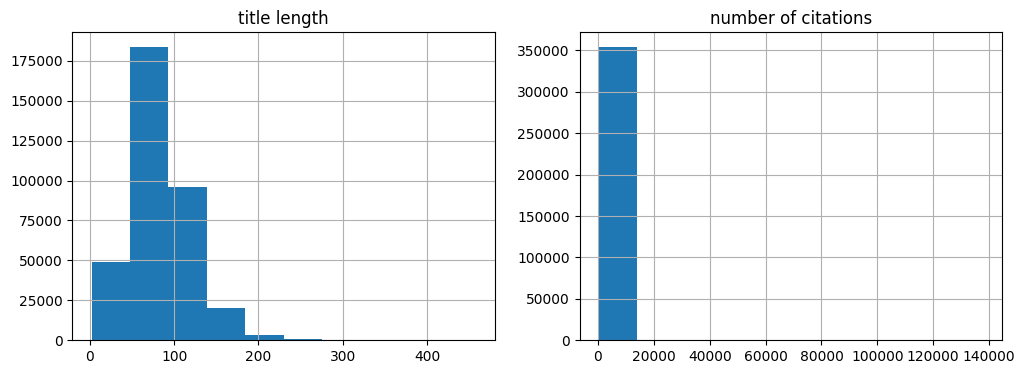

In [33]:
# plot title length and number of citations distributions
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
info_hcp2.title.dropna().apply(len).hist(ax=axs[0])
axs[0].set_title('title length')
info_hcp2.n_cits.dropna().hist(ax=axs[1])
axs[1].set_title('number of citations')
plt.show()


In [14]:
citations_hcp3.head()

,citing_pub_id,cited_pub_id,date
0,245658,2013150886,2002-01-01
1,245658,2138790588,2002-01-01
2,245658,2334566563,2002-01-01
3,718838,1604916109,2004-02-01
4,718838,1965439999,2004-02-01


<Axes: >

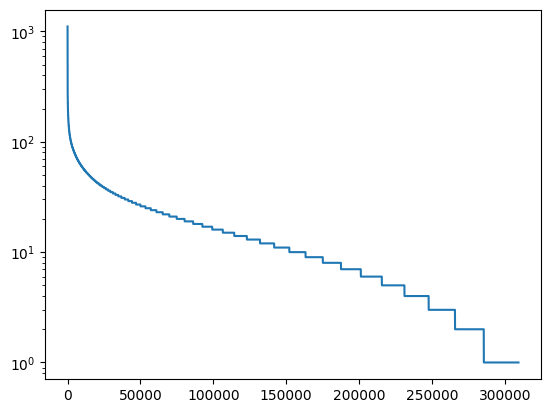

In [47]:
# group cited_pub_id by citing_pub_id
citations_sr = citations_hcp3.groupby('citing_pub_id')['cited_pub_id'].apply(set).apply(list)
# make a count series from cited_by_sr, sorted by descending order
cited_by_count = citations_sr.apply(len).sort_values(ascending=False)
# plot it
cited_by_count.reset_index(drop=True).plot(logy=True)

# The k-d to 2-d problem

After embedding your objects of interest into k-dimensional vectors, you might further embed them into two or three dimensions for visualization. This process inevitably loses some information and introduces distortions, but it's still valuable. The initial conversion of texts or images into numerical vectors also involved information loss, yet it was useful for your specific goals.

Dimensionality reduction typically results in losing some details. The key is to preserve the essential information (the "signal") and minimize the loss of less important details (the "noise"). Done well, this can be beneficial, especially if it enhances the signal-to-noise ratio.

This principle also applies to compressing vectors for visualization. The aim is to present complex data usefully and intuitively, enabling analysts to spot patterns and gain insights. It's a balance between maintaining utility and practical implementation when transforming k-dimensional data into two-dimensional forms.



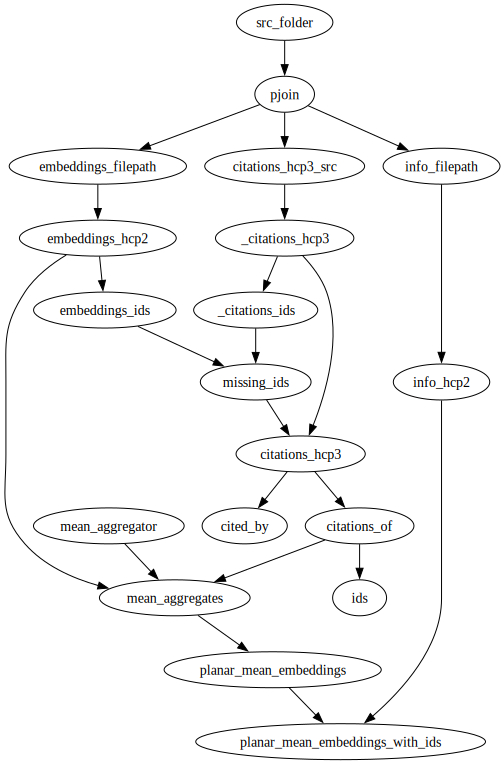

In [18]:
from i2.footprints import attribute_dependencies, init_argument_names
from imbed.mdat.hcp import Hcp3Dacc
from meshed.itools import graphviz_digraph

deps = dict(attribute_dependencies(Hcp3Dacc))

graphviz_digraph(deps)


In [24]:
rootdir = '/Users/thorwhalen/Dropbox/_odata/figiri/hcp'
dacc = Hcp3Dacc(rootdir)

In [25]:
t = dacc.citations_and_titles
print(f"{len(dacc.info_hcp2)=}, {len(dacc.citations_of)}, {dacc.citations_and_titles.shape=}")
t.head()

len(dacc.info_hcp2)=354165, 308135, dacc.citations_and_titles.shape=(308135, 3)


,cited_ids,id,title
0,"[2138790588, 2013150886]",245658,Standardized low-resolution brain electromagne...
2,"[1994893189, 2158553737, 1604916109, 202841896...",718838,Pathophysiology of obsessiveâcompulsive diso...
4,"[2114205159, 2161774890, 1965693998, 211020414...",831416,Remote Ischemic Preconditioning Provides Early...
5,"[2025976960, 2172013173]",898828,The Unknown Mechanism of the Overtraining Synd...
6,"[2138019504, 2127271355, 2103972604]",905619,Revisiting Frank-Wolfe: Projection-Free Sparse...
